In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import matplotlib.gridspec as gs
import math

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df_1 = pd.read_csv("../input/world-happiness-report-2021/world-happiness-report-2021.csv")
df_2 = pd.read_csv("../input/world-happiness-report-2021/world-happiness-report.csv")

In [3]:
df_1.head(10)

In [4]:
df_2.head(10)

# Data Cleaning

In [5]:
df_1.info()

Df_1 has no missing values. Data is clean.

In [6]:
df_2.isnull().sum().sort_values(ascending=False)

Missing Value Columns

1. Log GDP per capita 

2. Social Support

3. Healthy life expectancy at birth

4. Freedom to make life choices

5. Generosity

6. Perceptions of corruption 



In [7]:
df_2.drop(["Positive affect","Negative affect"],axis=1,inplace=True) 


In [8]:
df_2.head()

In [9]:
# for col in df_2:
#     print(f'{col} has {df_2[col].unique()} unique values')

In [10]:
hist_before = df_2.hist(figsize=(10,10))

In [11]:
df_2_copy = df_2.copy(deep = True)

In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# train_mice = train.copy(deep=True)

mice_imputer = IterativeImputer()
cols = ['Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices',
       'Generosity','Perceptions of corruption']
for i in cols:
    df_2_copy[i] = mice_imputer.fit_transform(df_2_copy[[i]])

In [13]:
df_2_copy.isnull().sum()

In [14]:
df_2_copy.to_csv('./imputed_world_happiness.csv')

**Data Cleaned!**

In [15]:
hist_after = df_2_copy.hist(figsize=(10,10))

# Descriptive Statistics

### Top Best and Worst Performing Countries

In [16]:
color=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]

fig= plt.figure(figsize=(15,8))
g=gs.GridSpec(ncols=1, nrows=2, figure=fig)
plt.suptitle("Top 10 and Bottom 10 countries in Happiens index 2021", weight='bold', size=20)
ax1=plt.subplot(g[0,0])

top_10=df_1.head(10)
bot_10= df_1.tail(10)
ax1=sns.barplot(data=top_10, x=top_10['Ladder score'],y=top_10['Country name'], color=color[4])
#ax1.set_xlabel('')
ax1.xaxis.set_visible(False)
ax1.annotate("Top 10 countries in Happiness index",xy=(8,2), weight='bold', size=12)
ax2=plt.subplot(g[1,0], sharex=ax1)
ax2=sns.barplot(data=bot_10, x=bot_10['Ladder score'],y=bot_10['Country name'], color=color[0])
ax2.annotate("Bottom 10 countries in Happiness index",xy=(8,2), weight='bold', size=12)
for s in ['left','right','top','bottom']:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

## Measures of Centrality

In [17]:
df_1.info()

## Measures of Centrality

In [18]:
cols_2 = ['Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices',
       'Generosity','Perceptions of corruption']
for i in cols_2:
    print(f'Mean for {i} is {df_1[i].mean()}')
print("")
for i in cols_2:
    print(f'Median for {i} is {df_1[i].median()}')


## Measures of Variability

In [19]:
import statistics

In [20]:
for i in cols_2:
    print(f'Standard Deviation for {i} is {statistics.stdev(df_1[i])}')
print("")
for i in cols_2:
    print(f'Variance for {i} is {statistics.variance(df_1[i])}')


**Descriptive Statistics by Country**

In [21]:
def des_stat_by_country(country_name):
    country = df_2_copy[df_2_copy["Country name"] == country_name]
    print(f'The mean for {country_name} is {country.mean()}')
    print("")
    print(f'The median for {country_name} is {country.median()}')
    print("")
    cols_2 = ['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices',
       'Generosity','Perceptions of corruption']
    for i in cols_2:
        print(f'The standard deviation of {i} for {country_name} is {statistics.stdev(country[i])}')
    print("")
    for i in cols_2:
        print(f'The variance of {i} for {country_name} is {statistics.variance(country[i])}')
    


In [22]:
des_stat_by_country('Finland')

# Inferential Statistics

### Hypothesis testing: Covid-19 had no effect on world happiness rankings despite the varying number of deaths

In [23]:
!pip install openpyxl

In [24]:
df_3 = pd.read_excel("../input/hypothesis-testing/world life ladder 2019.xlsx")
df_4 = pd.read_excel("../input/hypothesis-testing/world ladder score 2021.xlsx")

In [25]:
df_4.head(5)

In [26]:
df_3.isnull().sum()

In [27]:
df_4.isnull().sum()

In [28]:
LL_2019 = df_3['Life Ladder'].values

In [29]:
LL_2021 = df_4['Life Ladder'].values

In [30]:
sample_LL_2019 = df_3['Life Ladder'][np.argsort(np.random.random(len(LL_2019)))[:40]]
sample_LL_2021 = df_4['Life Ladder'][np.argsort(np.random.random(len(LL_2021)))[:40]]

In [31]:
sample_LL_2019


In [32]:
sample_LL_2021

In [33]:
var_LL_2019=np.var(LL_2019)
var_LL_2021=np.var(LL_2021)
mean_LL_2019=np.mean(sample_LL_2019)
mean_LL_2021=np.mean(sample_LL_2021)
n1=40
n2=40

In [34]:

sample_LL_2021.std()

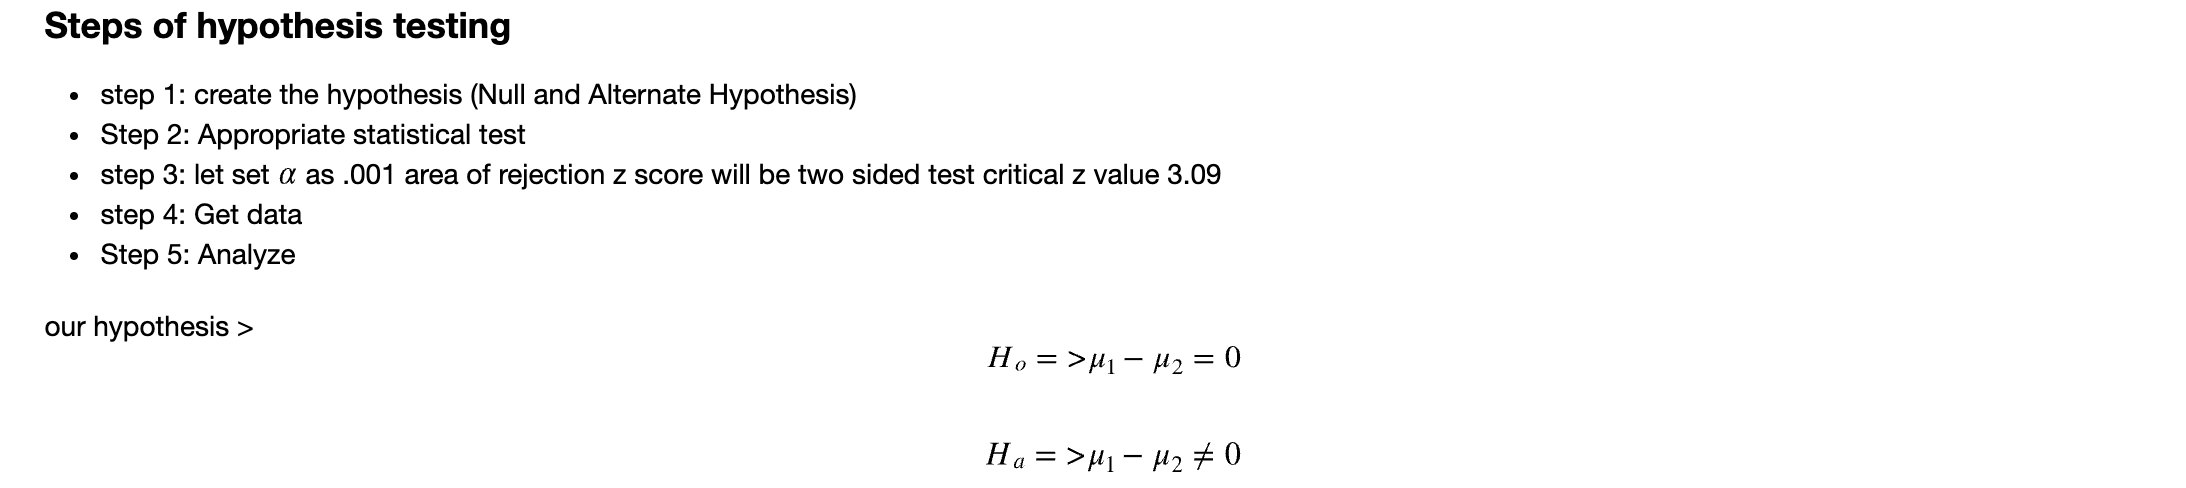

### Confidence Interval Estimation

In [35]:
t = 1.99 #from t- distribution table. Significance level of 0.05 

In [36]:
'{} <= mu1 - mu2 <= {}'.format((mean_LL_2019-mean_LL_2021)- t*(math.sqrt((var_LL_2019/40)+(var_LL_2021/40))) ,(mean_LL_2019-mean_LL_2021)+ t*(math.sqrt((var_LL_2019/40)+(var_LL_2021/40))) )

### t-Test for inference about 2 populations

In [37]:
import scipy.stats as stat

In [38]:
stat.ttest_ind(sample_LL_2019,sample_LL_2021,equal_var=False)  #at aplha =.05 (default)


In [39]:
0.515 < 0.05 #we reject null hypothesis; if false we cannot reject the null hypothesis

**We fail to reject the null hypothesis as P-value > 0.05. The available data doesn't provide sufficient evidence to suggest that the mean happiness scores changed after covid-19**

## Correlation 

In [56]:
import seaborn as sns

pd.set_option('display.max_colwidth',700)
df_5 = pd.read_excel('../input/world-happ/world-happiness-report-2005-2021 (1).xlsx')

sns.heatmap(df_5.corr(),annot=True)

In [41]:
#Calculating correlation metrics
from scipy.stats import linregress

dependent_columns = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
out =[]
for i in dependent_columns:
    out.append(linregress(df_5['Life Ladder'], df_5[i]))

In [42]:
out

In [43]:
out_p_value = [0.0,5.985e-320,0.0,1.0856068932496455e-151,1.827044922825602e-15,2.748736554107072e-90]
out_slope = [0.8065004707644212,0.075059854262504,4.917566425604761,0.0,6642470205285417,0.024474476039608693,-0.06838585838127949]
out_intercept = [4.960292078172671,0.4020252435643509,36.569395483746476,0.382604173894129,-0.13488864265663503,1.119894262445388]
out_r_value = [0.7842139951823006,0.7087586331473249,0.7424019072960114,0.5290992981658045,0.17242257439901607,-0.4196743295569185]
out_stderr = [0.01393829029921575,0.0016318513945481965,0.09693062373161429,0.0023269084879418934,0.0030540071007838813, 0.003230639611795276]

In [44]:

value_df = pd.DataFrame(list(zip(dependent_columns,out_slope,out_intercept,out_r_value,out_p_value,out_stderr)),columns =['Attribute','slope','intercept','r-value', 'p-value','stderr'])
value_df

*The above table represents the correlation of attributes with Life Ladder( Happiness Score ). As you can see from the P-value column all the correlations of all attributes with Life ladder is significant*

## Multivariate Regression

In [45]:
df_5.describe()

In [46]:
df_5.isnull().sum()

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error , mean_absolute_error , r2_score
from sklearn.model_selection import train_test_split

y = df_5['Life Ladder']

r2_score_list = []
explained_variance_list = []
mean_squared_error_list = []

In [48]:
# Function to get all subsets of the a list
def sub_lists(l):
    lists = []
    for i in range(len(l) + 1):
        for j in range(i):
            lists.append(l[j: i])
    return lists

In [49]:
#Linear regression 
def lin_regress(x):
    lin_reg = LinearRegression()
    for i in x:
        X_train,X_test,y_train,y_test = train_test_split(df_5[i],y,test_size=0.2,random_state=42)
        lin_reg.fit(X_train,y_train)
        y_pred = lin_reg.predict(X_test)
        r2_score_list.append(explained_variance_score(y_test,y_pred))
        explained_variance_list.append(r2_score(y_test,y_pred))
        mean_squared_error_list.append(mean_squared_error(y_test,y_pred))

In [50]:
reg_lists = sub_lists(['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'])

In [51]:
lin_regress(reg_lists)

In [52]:
df_metrics = pd.DataFrame(list(zip(reg_lists,r2_score_list, explained_variance_list, mean_squared_error_list)),columns =['Attribute', 'r2_score','explained_variance','mean_squared_error'])

In [53]:
df_metrics

In [54]:
sample_LL_2019.std()